In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = .5

In [3]:
# sigmoid activation function
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

# derivative of sigmoid activation function
def dsigmoid(input):
    return input * (1 - input)

In [4]:
# exclusive or function (true when number of true outputs is odd)
inputs = np.array([
    [0, 1], 
    [1, 0], 
    [0, 0], 
    [1, 1]
])
target_output = np.array([
    [1], 
    [1], 
    [0], 
    [0]
])

In [5]:
# initialize weights
weights_1 = 2 * np.random.randn(3,2) - 1
weights_2 = 2 * np.random.randn(3,1) - 1

# initialize bias
hidden_1_bias = np.ones((inputs.shape[0], 1))
output_bias = np.ones((inputs.shape[0], 1))

In [6]:
#takes in the inputs and adjusts the weights accordingly
def train(batch):
    global weights_2
    global weights_1

    ## feedforward
    input_with_bias = np.concatenate((batch, hidden_1_bias), axis=1)
    layer_1_output = sigmoid(np.dot(input_with_bias, weights_1))
    layer_1_with_bias = np.concatenate((layer_1_output, hidden_1_bias), axis=1)
    nn_output = sigmoid(np.dot(layer_1_with_bias, weights_2))

    ## backprop
    # output layer
    nn_output_error = np.subtract(target_output, nn_output)
    nn_output_delta = nn_output_error * dsigmoid(nn_output)

    # hidden layer 1
    weights_2_without_bias = np.delete(weights_2, weights_2.shape[0] - 1, 0)
    layer_1_error = np.dot(nn_output_delta, weights_2_without_bias.T)
    layer_1_delta = layer_1_error * dsigmoid(layer_1_output)

    # update weights
    weights_2 += np.dot(layer_1_with_bias.T, nn_output_delta) * learning_rate
    weights_1 += np.dot(input_with_bias.T, layer_1_delta) * learning_rate

    return nn_output_error, nn_output

In [7]:
error_list = []
index = []
for i in range(20000):
    nn_error, nn_output = train(inputs)
    mse = np.sum(nn_error*nn_error)/nn_error.shape[0]
    error_list.append(mse)
    index.append(i)
    if (i % 5000) == 0:
        print(mse)

0.3892809311123726
0.0006223541529823942
0.00027928098213811457
0.00017863614454243282


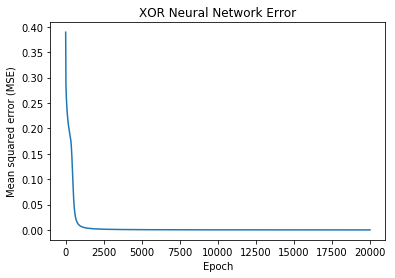

In [8]:
# plot mse vs. epoch
plt.plot(index, error_list)
plt.xlabel('Epoch')
plt.ylabel('Mean squared error (MSE)')
plt.title('XOR Neural Network Error')
plt.show()